# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import inv
#from numpy.linalg import solve
#from sklearn.linear_model import LinearRegression

In [2]:
class _LinearRegression:

    def __init__(self):
        self.coef_ = None # w
    
    def fit(self, X, y):
        e = np.ones((len(X), 1))
        X = np.append(e, X, axis=1)
        A = X.T.dot(X)
        b = X.T.dot(y.reshape(-1, 1))
        self.coef_ = inv(A).dot(b)
        #self.coef_ = solve(A, b)
        return self
    
    def predict(self, X):
        e = np.ones((len(X), 1))
        X = np.append(e, X, axis=1)
        return X.dot(self.coef_)
    
    def score(self, X, y):
        y_true = y
        y_pred = self.predict(X)
        u = ((y_true - y_pred) ** 2).sum() # residual sum of squares  
        v = ((y_true - y_true.mean()) ** 2).sum() # total sum of squares
        return np.round(1 - u/v, 2) # coefficient R^2

## Linear regression line

### Data initialization

In [3]:
X = np.array([[1], [2], [1], [3], [5], [4]])
y = np.array([5, 5, 4, 2, 2, 1])

### Fitting

In [4]:
model = _LinearRegression().fit(X, y)

### Scatterplot

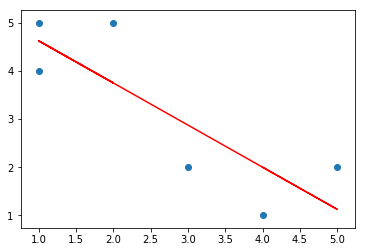

In [5]:
plt.plot(X, model.predict(X), zorder=2, c='red') 
plt.scatter(X, y, zorder=1)

## CPU Performance

### Import

In [6]:
columns = ['vendor name', 'Model Name', 'MYCT', 'MMIN','MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data', names = columns)

### Preprocessing

In [7]:
df.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [8]:
len(df)

209

In [9]:
df.nunique()

vendor name     30
Model Name     209
MYCT            60
MMIN            25
MMAX            23
CACH            22
CHMIN           15
CHMAX           31
PRP            116
ERP            104
dtype: int64

In [10]:
df.dtypes

vendor name    object
Model Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [11]:
df = df.drop('ERP', axis=1)

In [12]:
df = df.set_index('Model Name')

In [13]:
df = pd.get_dummies(df, drop_first=True)

### Attributes

In [14]:
target_attribute = ['PRP']
numeric_fields = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
all_fields = list(df.drop(target_attribute, axis=1))

## Numeric attributes model

### Fitting

In [15]:
model = _LinearRegression().fit(df[numeric_fields], np.array(df[target_attribute]))

### Performance

In [16]:
model.score(df[numeric_fields], np.array(df[target_attribute]))

0.86

## All attibutes model

### Fitting

In [17]:
model = _LinearRegression().fit(df[all_fields], np.array(df[target_attribute]))

### Performance

In [18]:
model.score(df[all_fields], np.array(df[target_attribute]))

0.9